# Persistencia homológica

# Instalación de Ripser

Ripser es una paquetería de homología persistente para Pyhton (https://ripser.scikit-tda.org/en/latest/)

Para instalarlo, se necesita Cython:

pip install Cython
pip install Ripser

## Ejemplo 1

In [13]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams

Generamos datos:

In [14]:
circulos, labels = datasets.make_circles(n_samples=500, noise=0.03, factor=0.2)

Para generar el digrama de persistencia y lo analizamos:

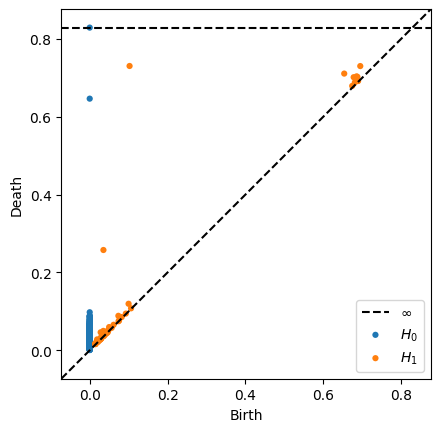

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

diagrams = ripser(circulos)['dgms']
plot_diagrams(diagrams, show=True)

Visualicemos

[]

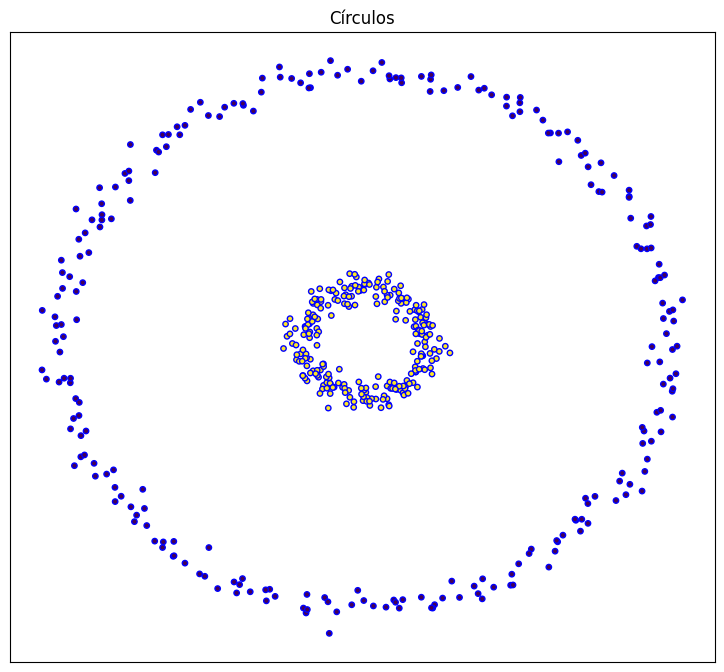

In [16]:
plt.figure(figsize=(20, 18))
ax = plt.subplot(221)
ax.scatter(circulos[:, 0], circulos[:, 1], c=labels, s=15, edgecolor="b")
ax.set_title("Círculos")
ax.set_xticks(())
ax.set_yticks(())

## Ejemplo 2

Importemos la librería para generar el siguiente ejemplo (previa instalación (pip install tadasets)):

In [17]:
import tadasets

Generemos los datos:

In [18]:
torus=tadasets.torus(n=500,c=20,a=0.3,noise=0.3)

Analicemos el diagrama:

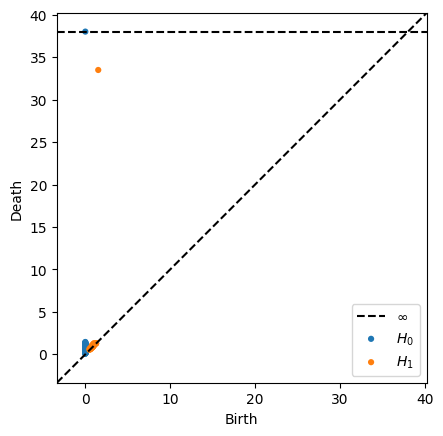

In [19]:
diagrams = ripser(torus)['dgms']
plot_diagrams(diagrams, show=True)

Con "maxdim" podemos ver homología de mayores dimensiones:

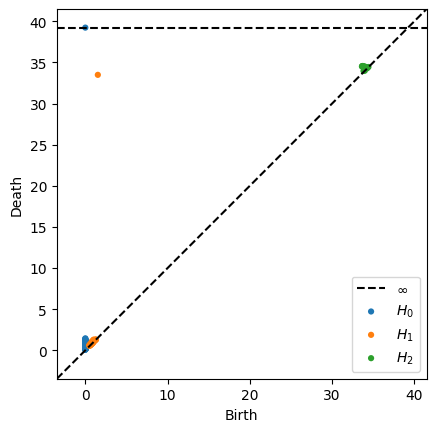

In [20]:
diagrams = ripser(torus, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

Visualicemos el ejemplo:

<Axes3D: >

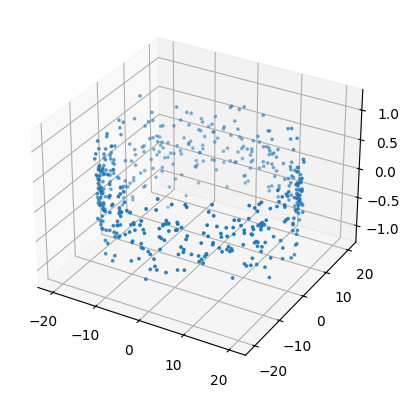

In [21]:
tadasets.plot3d(torus,s=3)

## Ejemplo 3

In [22]:
import pandas as pd

Leemos el archivo:

In [24]:
data = pd.read_csv('Diabetes.csv')

Quitamos las columnas no importantes:

In [25]:
feature_names=[c for c in data.columns if c not in ["Patient number","Clinical Classification"]]
X = np.array(data[feature_names].fillna(0))

Analicemos el diagrama:

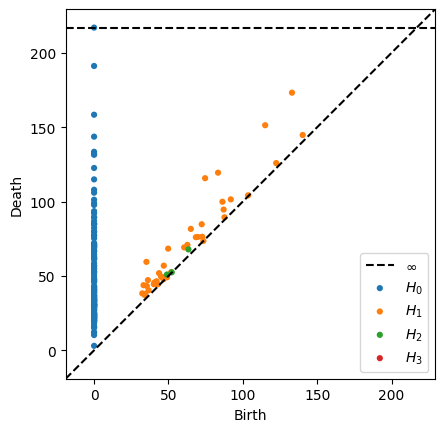

In [26]:
diagrams = ripser(X, maxdim=3)['dgms']
plot_diagrams(diagrams, show=True)

Podemos visualizar el diagrama para solamente una dimensión:

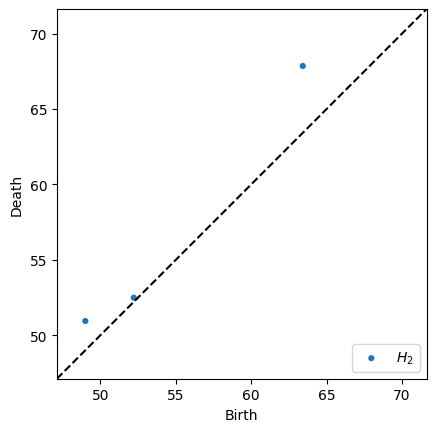

In [27]:
plot_diagrams(diagrams, plot_only=[2])

## Ejemplo 4

Generemos datos aleatoriamente

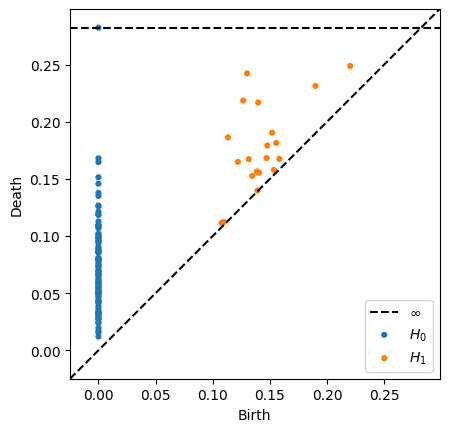

In [28]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

data = np.random.random((100,2))
diagrams = ripser(data)['dgms']
plot_diagrams(diagrams, show=True)

[]

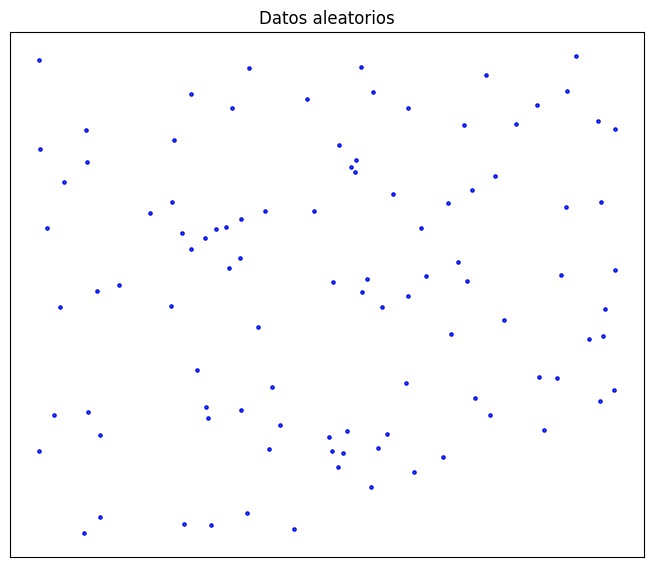

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
ax = plt.subplot(221)
ax.scatter(data[:, 0], data[:, 1], s=5, edgecolor="b")
ax.set_title("Datos aleatorios")
ax.set_xticks(())
ax.set_yticks(())

## Ruido

Veamos qué pasa con los diagramas si perturbamos un poco los datos

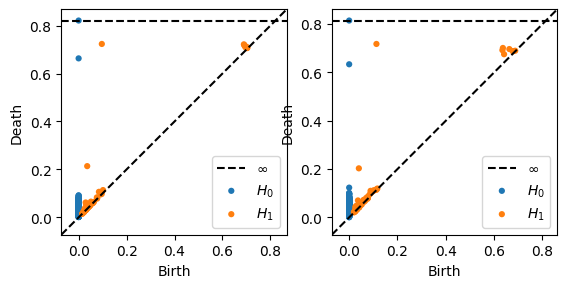

In [30]:
circulos1, labels1 = datasets.make_circles(n_samples=500, noise=0.03, factor=0.2)
circulos2, labels2 = datasets.make_circles(n_samples=500, noise=0.04, factor=0.2)

dgms1 = ripser(circulos1)['dgms']
dgms2 = ripser(circulos2)['dgms']

plot_diagrams(dgms1, ax=plt.subplot(121))
plot_diagrams(dgms2, ax=plt.subplot(122))

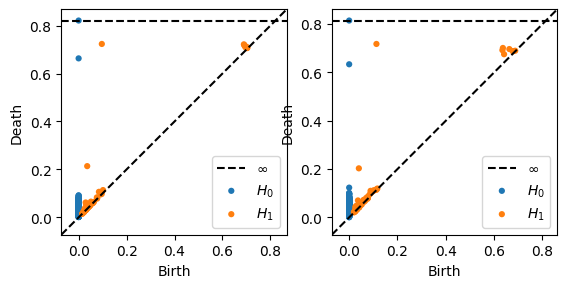

In [31]:
torus1=tadasets.torus(n=500,c=20,a=0.3,noise=0.3)
torus2=tadasets.torus(n=500,c=20,a=0.3,noise=0.4)

T_dgms1 = ripser(torus1,maxdim=2)['dgms']
T_dgms2 = ripser(torus2,maxdim=2)['dgms']

plot_diagrams(dgms1, ax=plt.subplot(121))
plot_diagrams(dgms2, ax=plt.subplot(122))

Usaremos la paquetería persim, la cual nos permite calcular distancias entre diagramas de persistencia: https://persim.scikit-tda.org/en/latest/index.html

pip install persim

In [32]:
import persim

Calculemos las distancias d cuello de botella de los diagramas de los círculos de $H_0$.

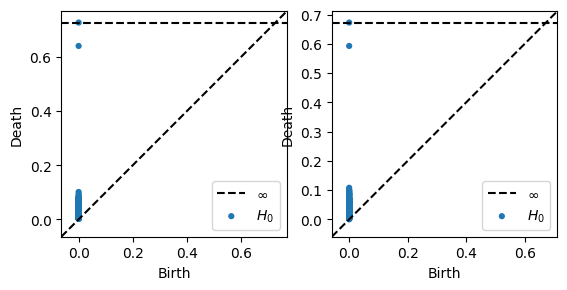

In [33]:
circulos1, labels1 = datasets.make_circles(n_samples=500, noise=0.03, factor=0.2)
circulos2, labels2 = datasets.make_circles(n_samples=500, noise=0.04, factor=0.2)

dgms1 = ripser(circulos1)['dgms'][0]
dgms2 = ripser(circulos2)['dgms'][0]

plot_diagrams(dgms1, ax=plt.subplot(121))
plot_diagrams(dgms2, ax=plt.subplot(122))

In [34]:
distance_bottleneck, matching = persim.bottleneck(dgms1, dgms2, matching=True)

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\bottleneck.py:55: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\bottleneck.py:64: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(


Visualizamos:

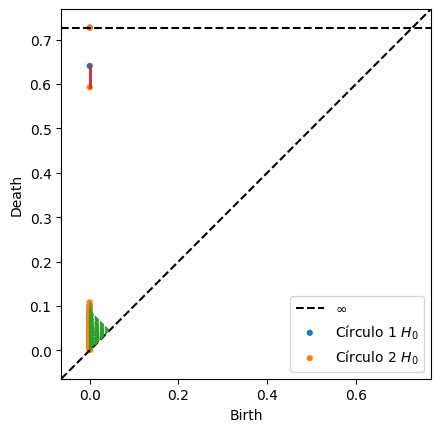

In [35]:
persim.bottleneck_matching(dgms1, dgms2, matching, labels=['Círculo 1 $H_0$', 'Círculo 2 $H_0$'])
plt.show()

Si solamente queremos la distancia:

In [36]:
print(distance_bottleneck)
persim.bottleneck(dgms1, dgms2)

0.04772907495498657


c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\bottleneck.py:55: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\persim\bottleneck.py:64: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(


0.04772907495498657